In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns
import urllib.request
from PIL import Image
import concurrent.futures
from collections import OrderedDict
import torch
import torch.utils
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.utils.data import Dataset
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import tensorflow as tf
import cv2
import requests
from io import BytesIO
from torch.utils.data import Dataset, DataLoader

import glob
import os
#from skimage import img_as_ubyte

In [4]:
Base_Aloe_Ferox_Dataset = pd.ExcelFile('BaseSet.xlsx')

In [5]:

Base_Set = {}
for sheet in Base_Aloe_Ferox_Dataset.sheet_names:
    df = Base_Aloe_Ferox_Dataset.parse(sheet)
    Base_Set[sheet] = df

flowers_base = Base_Set["FLOWERS"]
buds_base = Base_Set["BUDS"]
fruit_base = Base_Set["FRUIT"]
No_Evidence_Base = Base_Set["No Evidence"]

flowers_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,field:phenology (foa)
0,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
1,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
2,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
3,10790153,2011-08-14 00:00:00,2011-08-14,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2011-09-01 07:26:07 UTC,2018-06-07 16:13:47 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
4,10799481,2012-05-26 00:00:00,2012-05-26,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2012-06-15 01:15:18 UTC,2018-08-26 12:02:52 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN


In [6]:
buds_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,8154638,2017/04/30 7:56 AM EDT,2017-04-30,2017-04-30 11:56:00 UTC,Eastern Time (US & Canada),520,johnnybirder,Johnny Wilson,2017-09-28 16:43:38 UTC,2018-06-07 16:12:02 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,9272972,2007/07/01 9:41 AM BST,2007-07-01,2007-07-01 08:41:00 UTC,Europe/London,493784,mark185,Mark Wright,2017-12-27 13:16:33 UTC,2018-06-07 16:09:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [7]:
fruit_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,9034202,2017/11/24 2:54 PM SAST,2017-11-24,2017-11-24 12:54:00 UTC,Africa/Johannesburg,389997,shauns,Shaun Swanepoel,2017-12-03 21:28:02 UTC,2018-08-26 11:58:10 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,10832079,2012-10-12 00:00:00,2012-10-12,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2012-11-30 08:16:37 UTC,2018-11-19 09:09:18 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,10871050,2013-07-17 00:00:00,2013-07-17,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2013-07-30 01:59:08 UTC,2018-11-19 09:09:51 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10875477,2013-09-25 00:00:00,2013-09-25,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2013-10-17 17:28:07 UTC,2018-11-19 09:08:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10962203,2013-09-12 00:00:00,2013-09-12,NaN,Africa/Johannesburg,383144,tonyrebelo,Tony Rebelo,2014-05-03 23:49:34 UTC,2023-10-13 09:04:15 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [8]:
No_Evidence_Base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,11111885,2015-05-06 00:00:00,2015-05-06,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2015-05-17 11:20:21 UTC,2023-05-26 11:54:43 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,11197854,2015-11-20 00:00:00,2015-11-20,NaN,Pretoria,711873,benjamin_walton,Benjamin Walton,2016-01-27 11:54:52 UTC,2024-05-27 09:40:27 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,11245126,2017-01-17 00:00:00,2017-01-17,NaN,Africa/Johannesburg,664422,lizegreenieza,Lize van der Merwe,2017-06-12 15:59:45 UTC,2023-09-06 10:04:38 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,20173194,2017-06-24 00:00:00,2017-06-24,NaN,Pretoria,389997,shauns,Shaun Swanepoel,2017-08-16 08:05:05 UTC,2023-09-06 10:04:34 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,27389400,2015/01/07 4:23 AM PST,2015-01-07,2015-01-07 12:23:00 UTC,Pacific Time (US & Canada),1831095,douglasriverside,Douglas J. Long,2019-06-21 18:19:54 UTC,2020-10-11 11:04:47 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [9]:
def missing_values(df):
    print(f'Column\t\t\t% missing')
    print(f'{"-"}'*35) 
    return (df.isnull().sum()/len(df)*100
    ).astype(int)

missing_values(flowers_base)

Column			% missing
-----------------------------------


id                                    0
observed_on_string                    0
observed_on                           0
time_observed_at                      7
time_zone                             0
user_id                               0
user_login                            0
user_name                             4
created_at                            0
updated_at                            0
quality_grade                         0
license                               5
url                                   0
image_url                             0
sound_url                           100
tag_list                             93
description                          88
num_identification_agreements         0
num_identification_disagreements      0
captive_cultivated                    0
oauth_application_id                 88
place_guess                           0
latitude                              0
longitude                             0
positional_accuracy                  10


In [10]:
#all null columns or columns with 100% the same value have been removed
useful = ['id','observed_on','image_url','num_identification_agreements','latitude','longitude','field:phenology (foa)']

flowers_one= flowers_base[useful]
buds_one = buds_base[useful]
fruit_one = fruit_base[useful]
No_Evidence_one = No_Evidence_Base[useful]

flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
fruit_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
No_Evidence_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_17780\884026182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_17780\884026182.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_17780\884026182.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [11]:
train_flowers = flowers_one[flowers_one.phenology.isnull()]
train_buds = buds_one[buds_one.phenology.isnull()]
train_fruit = fruit_one[fruit_one.phenology.isnull()]
train_No_Evidence = No_Evidence_one[No_Evidence_one.phenology.isnull()]

In [12]:
test_flowers = flowers_one[flowers_one.phenology.notnull()]
test_buds = buds_one[buds_one.phenology.notnull()]
test_fruit = fruit_one[fruit_one.phenology.notnull()]
test_No_Evidence = No_Evidence_one[No_Evidence_one.phenology.notnull()]

In [13]:
test_flowers.head()
#test_buds.head()
#test_fruit.head()
#test_No_Evidence.head()

,id,observed_on,image_url,num_identification_agreements,latitude,longitude,phenology
309,123502268,2022-06-16,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.250185,26.967054,Flowers & Buds
311,124524639,2022-06-20,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.068978,27.174663,Flowers & Buds
315,125585296,2022-07-09,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.452610,26.635715,Flowers
316,125585317,2022-07-09,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.430468,26.611436,Flowers
321,127508909,2022-07-22,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.318718,26.670864,Flowers


In [14]:
train_flowers["phenology"]="Flowers"
train_buds["phenology"]="Buds"
train_fruit["phenology"]="Fruit"
train_No_Evidence["phenology"]="No Evidence"

C:\Users\micha\AppData\Local\Temp\ipykernel_17780\1268193639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_flowers["phenology"]="Flowers"
C:\Users\micha\AppData\Local\Temp\ipykernel_17780\1268193639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_buds["phenology"]="Buds"
C:\Users\micha\AppData\Local\Temp\ipykernel_17780\1268193639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [15]:
Test_set = pd.concat([test_flowers, test_buds, test_fruit, test_No_Evidence], axis=0)
Train_set = pd.concat([train_flowers, train_buds, train_fruit, train_No_Evidence], axis=0)

Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 620
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             1862 non-null   int64         
 1   observed_on                    1862 non-null   datetime64[ns]
 2   image_url                      1862 non-null   object        
 3   num_identification_agreements  1862 non-null   int64         
 4   latitude                       1862 non-null   float64       
 5   longitude                      1862 non-null   float64       
 6   phenology                      1862 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 116.4+ KB


In [16]:
missing_values(Train_set)

Column			% missing
-----------------------------------


id                               0
observed_on                      0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
phenology                        0
dtype: int64

In [17]:
Train_set = Train_set.dropna()

Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 620
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             1862 non-null   int64         
 1   observed_on                    1862 non-null   datetime64[ns]
 2   image_url                      1862 non-null   object        
 3   num_identification_agreements  1862 non-null   int64         
 4   latitude                       1862 non-null   float64       
 5   longitude                      1862 non-null   float64       
 6   phenology                      1862 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 116.4+ KB


In [18]:
missing_values(Test_set)

Column			% missing
-----------------------------------


id                               0
observed_on                      0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
phenology                        0
dtype: int64

In [19]:
#Train_set.sort_values(by='phenology')

In [20]:
#Test_set.sort_values(by='phenology')

In [21]:
Train_set[Train_set.duplicated()]

,id,observed_on,image_url,num_identification_agreements,latitude,longitude,phenology


In [22]:
Train_set.describe([x*0.1 for x in range(10)])
Test_set.describe([x*0.1 for x in range(10)])

,id,observed_on,num_identification_agreements,latitude,longitude
count,6.640000e+02,664,664.000000,664.000000,664.000000
mean,1.696178e+08,2023-06-04 06:04:20.240963840,1.293675,-32.940885,25.713149
min,1.195873e+08,2017-09-22 00:00:00,1.000000,-33.833698,21.314178
0%,1.195873e+08,2017-09-22 00:00:00,1.000000,-33.833698,21.314178
10%,1.344025e+08,2022-08-28 00:00:00,1.000000,-33.521832,22.607768
20%,1.688603e+08,2023-06-21 00:00:00,1.000000,-33.501232,22.954928
30%,1.711919e+08,2023-06-24 00:00:00,1.000000,-33.474455,23.314697
40%,1.715134e+08,2023-07-01 00:00:00,1.000000,-33.387423,26.134647
50%,1.719922e+08,2023-07-04 00:00:00,1.000000,-33.292857,26.589494
60%,1.736323e+08,2023-07-08 00:00:00,1.000000,-33.125465,26.745219


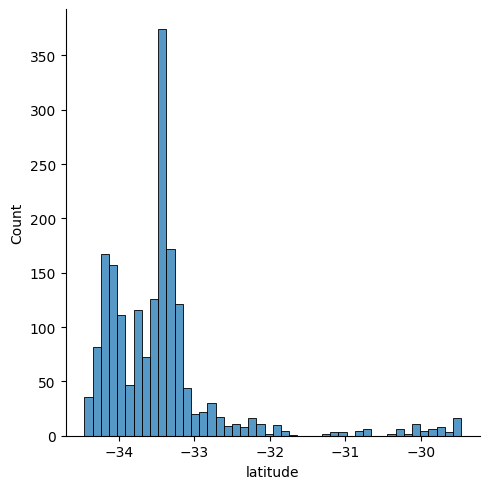

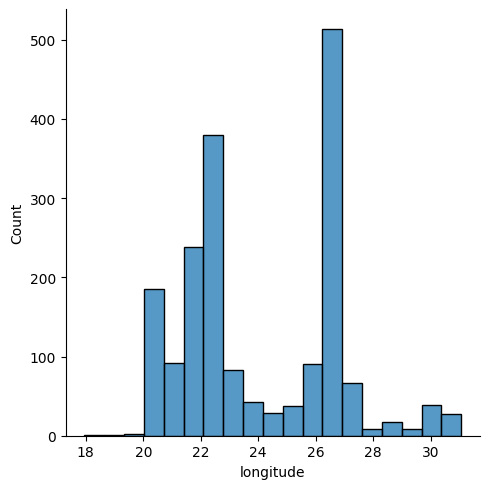

In [23]:
sns.displot(data =Train_set['latitude'])
sns.displot(data =Train_set['longitude'])

In [24]:
print(Test_set.index)

Index([309, 311, 315, 316, 321, 322, 333, 342, 344, 345,
       ...
       548, 551, 552, 553, 554, 555, 556, 557, 558, 579],
      dtype='int64', length=664)


In [25]:
Train_set = Train_set.reset_index(drop=True)
Test_set = Test_set.reset_index(drop=True)

In [26]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             664 non-null    int64         
 1   observed_on                    664 non-null    datetime64[ns]
 2   image_url                      664 non-null    object        
 3   num_identification_agreements  664 non-null    int64         
 4   latitude                       664 non-null    float64       
 5   longitude                      664 non-null    float64       
 6   phenology                      664 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 36.4+ KB


In [27]:
missing_values(Train_set)

Column			% missing
-----------------------------------


id                               0
observed_on                      0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
phenology                        0
dtype: int64

In [28]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             1862 non-null   int64         
 1   observed_on                    1862 non-null   datetime64[ns]
 2   image_url                      1862 non-null   object        
 3   num_identification_agreements  1862 non-null   int64         
 4   latitude                       1862 non-null   float64       
 5   longitude                      1862 non-null   float64       
 6   phenology                      1862 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 102.0+ KB


In [29]:
lastTrain_set = Train_set[['image_url','phenology']].copy()
lastTrain_set.head()

,image_url,phenology
0,https://inaturalist-open-data.s3.amazonaws.com...,Flowers
1,https://inaturalist-open-data.s3.amazonaws.com...,Flowers
2,https://inaturalist-open-data.s3.amazonaws.com...,Flowers
3,https://inaturalist-open-data.s3.amazonaws.com...,Flowers
4,https://inaturalist-open-data.s3.amazonaws.com...,Flowers


In [30]:
def download_image(image_url, image_name_counter, folder):
    file_name = f"./{folder}/{image_name_counter}.png"
    urllib.request.urlretrieve(image_url, file_name)
    print(f"Downloaded {file_name}")

In [31]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(lambda x: download_image(x[1], x[0], "Train"), enumerate(lastTrain_set['image_url'], start=1))
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(lambda x: download_image(x[1], x[0], "Test"), enumerate(Test_set['image_url'], start=1))

Downloaded ./Train/3.png
Downloaded ./Train/4.png
Downloaded ./Train/2.png
Downloaded ./Train/6.png
Downloaded ./Train/5.png
Downloaded ./Train/1.png
Downloaded ./Train/7.png
Downloaded ./Train/11.png
Downloaded ./Train/9.png
Downloaded ./Train/8.png
Downloaded ./Train/15.png
Downloaded ./Train/19.png
Downloaded ./Train/18.png
Downloaded ./Train/13.pngDownloaded ./Train/17.png
Downloaded ./Train/14.png

Downloaded ./Train/16.png
Downloaded ./Train/22.png
Downloaded ./Train/12.png
Downloaded ./Train/21.png
Downloaded ./Train/23.png
Downloaded ./Train/20.png
Downloaded ./Train/24.png
Downloaded ./Train/25.png
Downloaded ./Train/28.png
Downloaded ./Train/27.png
Downloaded ./Train/26.png
Downloaded ./Train/31.png
Downloaded ./Train/32.png
Downloaded ./Train/30.png
Downloaded ./Train/29.png
Downloaded ./Train/35.png
Downloaded ./Train/33.png
Downloaded ./Train/34.png
Downloaded ./Train/37.png
Downloaded ./Train/36.png
Downloaded ./Train/10.png
Downloaded ./Train/38.png
Downloaded ./Train/39

In [32]:
Train_set.head()

,id,observed_on,image_url,num_identification_agreements,latitude,longitude,phenology
0,9865839,2017-06-24,https://inaturalist-open-data.s3.amazonaws.com...,3,-33.983704,22.507295,Flowers
1,10787160,2011-07-15,https://inaturalist-open-data.s3.amazonaws.com...,6,-33.805170,22.195170,Flowers
2,10787636,2011-07-29,https://inaturalist-open-data.s3.amazonaws.com...,6,-33.369140,22.165330,Flowers
3,10790153,2011-08-14,https://inaturalist-open-data.s3.amazonaws.com...,4,-33.286420,23.510640,Flowers
4,10799481,2012-05-26,https://inaturalist-open-data.s3.amazonaws.com...,9,-33.835280,22.338470,Flowers


In [33]:
Train_labels = []
Test_Labels = []
for i in range(len(lastTrain_set)-5):
    Train_labels.append(lastTrain_set['phenology'][i])

for i in range(len(Test_set)):
    Test_Labels.append(Test_set['phenology'][i])

print(Train_labels)
print(len(Train_labels))

['Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers'

In [34]:
import re

def extract_number(filename):
    # Use regex to find numbers in the filename
    match = re.search(r'(\d+)', filename)
    return int(match.group(0)) if match else float('inf')

In [35]:
Test_image_list = []
Train_image_list = []
SIZE = 224
#Change path back to main folders
path_test = r".\Test\*.png"
path_train = r".\Train\*.png"

Test_image_list = sorted(glob.glob(path_test),key=lambda x: extract_number(os.path.basename(x)))
Train_image_list = sorted(glob.glob(path_train),key=lambda x: extract_number(os.path.basename(x)))

#Test_image_list = np.array(Test_image_list)
#Train_image_list  = np.array(Train_image_list)

In [36]:
Test_image_list
print(len(Train_image_list))

1857


In [37]:
processedDF = pd.DataFrame({'image': Train_image_list,
                            'phenology': Train_labels})

In [38]:
processedDF.head()

,image,phenology
0,.\Train\1.png,Flowers
1,.\Train\2.png,Flowers
2,.\Train\3.png,Flowers
3,.\Train\4.png,Flowers
4,.\Train\5.png,Flowers


In [39]:
processedDF['phenology'] = processedDF['phenology'].astype('category').cat.codes

In [ ]:

# Image transformations (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        
        path = self.dataframe.iloc[idx]['image']
        label = self.dataframe.iloc[idx]['phenology']
        
        # load image
        image = Image.open(path).convert("RGB")
        
        # Apply transformations
        if self.transform:
            image = self.transform(image)

        label = torch.tensor(label, dtype=torch.long)
        
        return image, label

# Initialize dataset and dataloader
dataset = ImageDataset(dataframe=processedDF, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class SingleLabelCNN(nn.Module):
    def __init__(self, num_classes):
        super(SingleLabelCNN, self).__init__()
        self.base_model = models.resnet18(pretrained=True)
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)  # Adjust for single label output

    def forward(self, x):
        x = self.base_model(x)
        return nn.functional.log_softmax(x, dim=1)  # Use softmax for single-label classification

# Instantiate the model with the number of classes
num_classes = len(processedDF['phenology'].unique())  # Number of unique classes in the dataframe
model = SingleLabelCNN(num_classes).to(device)

c:\Users\micha\OneDrive\Documents\GitHub\AloeFeroxAlgorithm\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\micha\OneDrive\Documents\GitHub\AloeFeroxAlgorithm\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [43]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy for single-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [45]:
# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for image, label in dataloader:
        image = image.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        outputs = model(image)
        loss = criterion(outputs, label)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}")

Epoch [1/15], Loss: 0.8687
Epoch [2/15], Loss: 0.7456
Epoch [3/15], Loss: 0.7267
Epoch [4/15], Loss: 0.6118
Epoch [5/15], Loss: 0.5447
Epoch [6/15], Loss: 0.5475
Epoch [7/15], Loss: 0.5188
Epoch [8/15], Loss: 0.5293
Epoch [9/15], Loss: 0.4734
Epoch [10/15], Loss: 0.4404
Epoch [11/15], Loss: 0.4480
Epoch [12/15], Loss: 0.6535
Epoch [13/15], Loss: 0.4454
Epoch [14/15], Loss: 0.4059
Epoch [15/15], Loss: 0.3862


In [ ]:
model.eval()

# Initialize counters for accuracy
correct = 0
total = 0

# Turn off gradients
with torch.no_grad():
    for images, labels in dataloader:
        # Move data to the appropriate device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass: get predictions
        outputs = model(images)
        
        # Get the predicted class with the highest score
        _, predicted = torch.max(outputs, 1)
        
        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

Accuracy of the model on the test dataset: 83.95%


__Save model to torch file__

In [47]:
torch.save(model, 'final_model.pth')

__Load model from torch file__

In [52]:
loaded_model = torch.load('final_model.pth')
loaded_model.eval()

C:\Users\micha\AppData\Local\Temp\ipykernel_17780\2595520329.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('final_model.pth')


SingleLabelCNN(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [96]:
def preprocess_image(image_path, target_size=(224, 224)):
    preprocess = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),  
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    img = Image.open(image_path)
    img_tensor = preprocess(img).unsqueeze(0)
    return img_tensor


In [99]:
# Path to the image you want to classify
image_path = 'Train/1.png'

# Preprocess the image
img_tensor = preprocess_image(image_path, target_size=(224, 224))

# Predict the class
with torch.no_grad():  # Disable gradient tracking
    output = loaded_model(img_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

print(f'Predicted class: {predicted_class}')


Predicted class: 0


In [103]:
testDF = pd.DataFrame({'image': Test_image_list,
    'phenology': Test_Labels})
testDF['phenology'] = testDF['phenology'].astype('category').cat.codes

In [105]:
correct_outputs = 0

for _, row in testDF.iterrows():
    # Preprocess each image
    img_tensor = preprocess_image(row['image'])
    
    # Make prediction
    with torch.no_grad():  # No need for gradients during inference
        output = loaded_model(img_tensor)
        predicted_class = torch.argmax(output, dim=1).item()

    # Compare with the true label
    if predicted_class == row['phenology']:
        correct_outputs += 1

# Calculate accuracy
accuracy = correct_outputs / len(testDF)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 16.27%
